In [31]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdMolDescriptors

# Hantzsch thiazole synthesis
thiourea = Chem.MolFromSmiles("CN(C)C(=S)N")
haloketone = Chem.MolFromSmiles("c1ccccc1C(=O)C(C)Cl")
rxn_smarts = "[NH2:1][C:2](=[S:3])[NH0:4].[C:5](=[O:6])[C:7][Cl:8]>>[N:4][c:2]1[s:3][c:5][c:7][n:1]1.[Cl:8][H].[OH2:6]"

rxn = AllChem.ReactionFromSmarts(rxn_smarts)
product = rxn.RunReactants((thiourea, haloketone))[0][0]
Chem.SanitizeMol(product)
rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE
all_three = [thiourea, haloketone, product]
formulae = [rdMolDescriptors.CalcMolFormula(mol) for mol in all_three]
Draw.MolsToGridImage(all_three, legends=formulae)


name2mol = {"thiourea": thiourea, "haloketone": haloketone, "product": product}
# Get the SVG string


for name, mol in name2mol.items():
    formula = rdMolDescriptors.CalcMolFormula(mol)
    # draw to svg
    drawer = Draw.rdMolDraw2D.MolDraw2DSVG(300, 300)  # Set the size of the image
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    svg = svg.replace(
        f"<text x='5' y='15' font-family='sans-serif' font-size='10' fill='black'>{name}</text>",
        f"<text x='5' y='15' font-family='sans-serif' font-size='10' fill='black'>{name} ({formula})</text>",
    )

    with open(f"{name}.svg", "w") as f:
        f.write(svg)


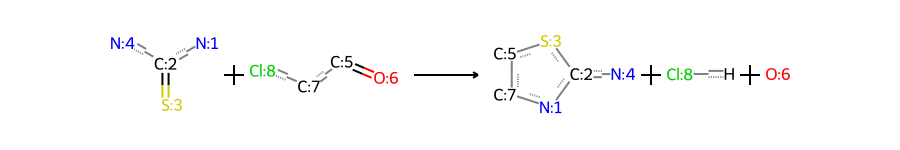

In [32]:
rxn


In [28]:
product = rxn.RunReactants((thiourea, haloketone))[0]
len(product)

1